In [62]:
# Uncomment following lines if you are running on Google Colab
# Drive and folder directory may need to be changed
# from google.colab import drive
# drive.mount('/content/drive')
# %ls /content/drive/MyDrive
# %cd /content/drive/MyDrive/10-701-Project
# %pip install tensorboardX
from train import *
import helpers
import copy, glob
from plots import *
import pandas as pd

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
FIGDIR = 'fig/'

## Running a specific experiment configuration 

In [ ]:
params = {
    'lr': 0.05,
    'dp': True,
    'clipping': 'Linear',
    'num_microbatches': 32,
    'batch_size': 32,
    'S': 1,
    'z': 1.1,
    'gamma': 0.5,
    'lr_c': 0.2,
    'momentum': 0.5,
    'decay': 0,
    'n_epochs' : 20,
}

run_exp('run_a', params, use_devset=True)

## Fetch experiment results over all runs and plot

### Experiment 1 

In [ ]:
exp, params = helpers.load_exp('central_baseline_fixed')
exp['epoch'] = exp['epoch'] + 1
plot_centralized_fixed_cuttoff_experiment(exp)

### Main Experiment

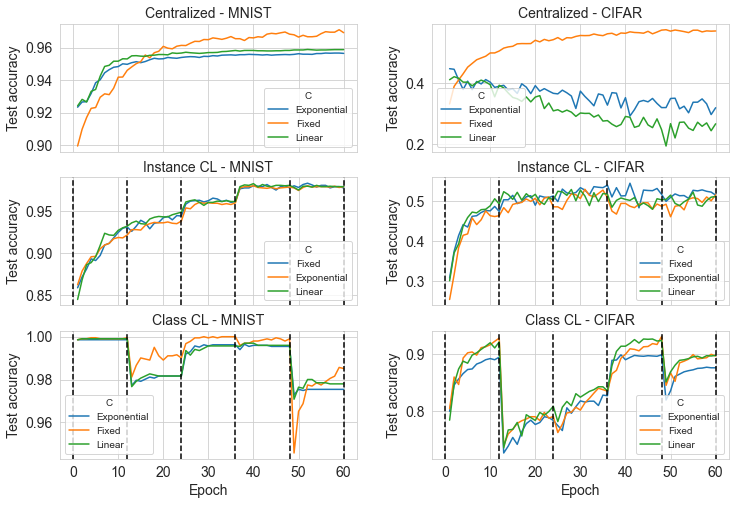

In [84]:
f, axes = plt.subplots(3, 2, figsize=(12,8), sharey=False, sharex=True)
plt.subplots_adjust(wspace = 0.25)

#######################################################################
############## Centralized learning ##############
ceexp, params = helpers.load_exp('central_baseline_adaptive')
ceexp['epoch'] = ceexp['epoch'] + 1

mnist = ceexp[ceexp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc', ax=axes[0][0])

axes[0][0].set_title('Centralized - MNIST', fontsize=14)
axes[0][0].set_ylabel('Test accuracy', fontsize=14)
axes[0][0].tick_params(labelsize=14)

cifar = ceexp[ceexp['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=cifar, x='epoch', hue='C', y='test_acc', ax=axes[0][1])

axes[0][1].set_title('Centralized - CIFAR', fontsize=14)
axes[0][1].set_xlabel('Epoch', fontsize=14)
axes[0][1].set_ylabel('Test accuracy', fontsize=14)
axes[0][1].tick_params(labelsize=14)


#######################################################################
############## Instance Incremental Continual learning ################
cl_exp, params = helpers.load_exp('Instance_CL', extension='epoch')
cl_exp['epoch'] = cl_exp['epoch'] + 1

mnist = cl_exp[cl_exp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc', ax=axes[1][0])

for i in range(6):
    axes[1][0].axvline(x=12*i, color='k', linestyle='--')
    
axes[1][0].set_title('Instance CL - MNIST', fontsize=14)
axes[1][0].set_ylabel('Test accuracy', fontsize=14)
axes[1][0].tick_params(labelsize=14)

cifar = cl_exp[cl_exp['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=cifar, x='epoch', hue='C', y='test_acc', ax=axes[1][1])

for i in range(6):
    axes[1][1].axvline(x=12*i, color='k', linestyle='--')
    
axes[1][1].set_title('Instance CL - CIFAR', fontsize=14)
axes[1][1].set_ylabel('Test accuracy', fontsize=14)
axes[1][1].tick_params(labelsize=14)

######################################################################
#######################################################################
############## Class Incremental Continual learning ################

cl_exp, params = helpers.load_exp('Class_CL', extension='epoch')
cl_exp['epoch'] = cl_exp['epoch'] + 1

mnist = cl_exp[cl_exp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc', ax=axes[2][0])

for i in range(6):
    axes[2][0].axvline(x=12*i, color='k', linestyle='--')
    
axes[2][0].set_title('Class CL - MNIST', fontsize=14)
axes[2][0].set_ylabel('Test accuracy', fontsize=14)
axes[2][0].set_xlabel('Epoch', fontsize=14)
axes[2][0].tick_params(labelsize=14)

cifar = cl_exp[cl_exp['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=cifar, x='epoch', hue='C', y='test_acc', ax=axes[2][1])

for i in range(6):
    axes[2][1].axvline(x=12*i, color='k', linestyle='--')
    
axes[2][1].set_title('Class CL - CIFAR', fontsize=14)
axes[2][1].set_ylabel('Test accuracy', fontsize=14)
axes[2][1].set_xlabel('Epoch', fontsize=14)
axes[2][1].tick_params(labelsize=14)

plt.savefig(f'{FIGDIR}main_exp.png', dpi=400, bbox_inches='tight')


In [85]:
cl_exp, params = helpers.load_exp('Class_CL', extension='task')
class_cl = cl_exp[cl_exp['task'] == 4]
class_cl.loc[:, 'scenario'] = 'Class'

cl_exp, params = helpers.load_exp('Instance_CL', extension='task')
instance_cl = cl_exp[cl_exp['task'] == 4]
instance_cl.loc[:, 'scenario'] = 'Instance'




/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_30329/712087912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_cl.loc[:, 'scenario'] = 'Class'
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_30329/712087912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instance_cl.loc[:, 'scenario'] = 'Instance'


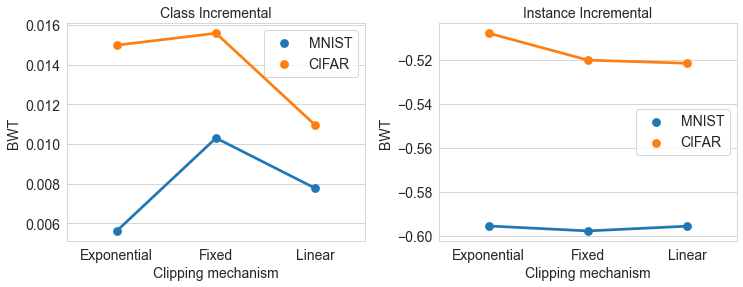

In [127]:
f, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False, sharex=True)
plt.subplots_adjust(wspace = 0.25)

sns.pointplot(data=instance_cl, x='C', y='BWT', hue='benchmark', ax=axes[0])
axes[0].set_title('Class Incremental', fontsize=14)
axes[0].tick_params(labelsize=14)
axes[0].set_ylabel('BWT', fontsize=14)
axes[0].legend(loc=1, prop={'size': 14})
axes[0].set_xlabel('Clipping mechanism', fontsize=14)


sns.pointplot(data=class_cl, x='C', y='BWT', hue='benchmark', ax=axes[1])
axes[1].set_title('Instance Incremental', fontsize=14)
axes[1].tick_params(labelsize=14)
axes[1].set_ylabel('BWT', fontsize=14)
axes[1].legend(loc=5, prop={'size': 14})
axes[1].set_xlabel('Clipping mechanism', fontsize=14)

plt.savefig(f'{FIGDIR}cl_metrics.png', dpi=400, bbox_inches='tight')


<AxesSubplot:xlabel='C', ylabel='BWT'>

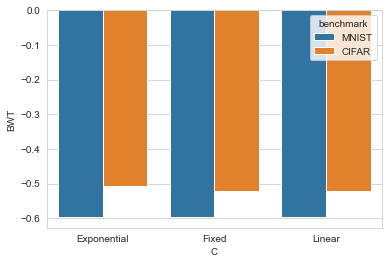

In [89]:
sns.barplot(data=class_cl, x='C', y='BWT', hue='benchmark')

In [74]:


pd.concat([instance_cl, class_cl])


,FWT,BWT,ACC,task,benchmark,C,scenario
4,0.953393,0.005624,0.962841,4,MNIST,Fixed,Instance
4,0.521950,0.014981,0.525541,4,CIFAR,Fixed,Instance
4,0.952739,0.010303,0.963041,4,MNIST,Exponential,Instance
4,0.500050,0.015581,0.506711,4,CIFAR,Exponential,Instance
4,0.957891,0.007774,0.965845,4,MNIST,Linear,Instance
4,0.515000,0.010954,0.521735,4,CIFAR,Linear,Instance
4,0.000000,-0.595454,0.193610,4,MNIST,Exponential,Class
4,0.000000,-0.508054,0.175280,4,CIFAR,Exponential,Class
4,0.000000,-0.597689,0.195513,4,MNIST,Fixed,Class
4,0.000000,-0.520236,0.179187,4,CIFAR,Fixed,Class


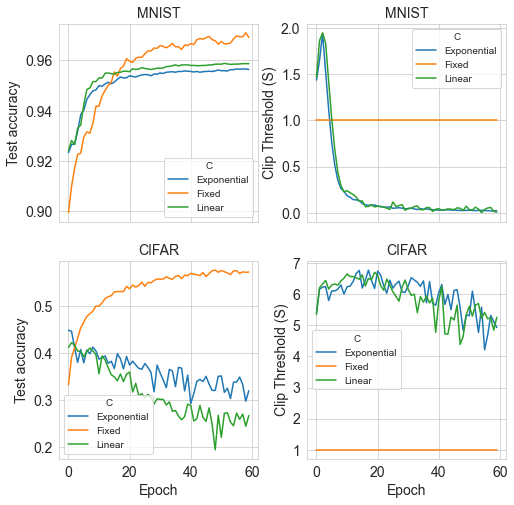

In [45]:
exp, params= helpers.load_exp('central_baseline_adaptive_cuttoff')
plot_centralized_adaptive_cuttoff_experiment(exp)

In [4]:
exp_epoch, params= helpers.load_exp('Class_CL', extension='epoch')
exp_task, params= helpers.load_exp('Class_CL', extension='task')
# plot_centralized_adaptive_cuttoff_experiment(exp)

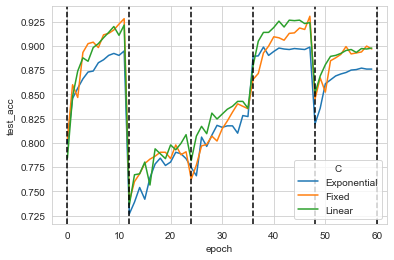

In [15]:
exp_epoch, params= helpers.load_exp('Class_CL', extension='epoch')

mnist = exp_epoch[exp_epoch['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc')

for i in range(6):
    plt.axvline(x=12*i, color='k', linestyle='--')
    
axes[0][0].set_title('MNIST', fontsize=14)
axes[0][0].set_ylabel('Test accuracy', fontsize=14)
axes[0][0].tick_params(labelsize=14)

In [ ]:
mnist = exp[exp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc')


In [15]:

exp_task



,FWT,BWT,task,benchmark,C
0,0.0,0.000000,0,MNIST,Exponential
1,0.0,0.000000,1,MNIST,Exponential
2,0.0,-0.333333,2,MNIST,Exponential
3,0.0,-0.500000,3,MNIST,Exponential
4,0.0,-0.600000,4,MNIST,Exponential
5,0.0,-0.666667,5,MNIST,Exponential
6,0.0,-0.714286,6,MNIST,Exponential
7,0.0,-0.750000,7,MNIST,Exponential
8,0.0,-0.777778,8,MNIST,Exponential
9,0.0,-0.800000,9,MNIST,Exponential
